In [72]:
import pandas as pd
import ast
from sklearn.preprocessing import MultiLabelBinarizer

In [73]:
df=pd.read_csv('preprocessed_movies.csv')
df.head()
df = df.rename(columns={'cast': 'actors'})


#HANDLE GENRE USING MULTI-HOT ENCODING

In [74]:
df['genres'].head()

0    ['Action', 'Adventure', 'Fantasy', 'Science Fi...
1                   ['Adventure', 'Fantasy', 'Action']
2                     ['Action', 'Adventure', 'Crime']
3             ['Action', 'Crime', 'Drama', 'Thriller']
4           ['Action', 'Adventure', 'Science Fiction']
Name: genres, dtype: object

In [75]:
df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df['genres'].head()

0    [Action, Adventure, Fantasy, Science Fiction]
1                     [Adventure, Fantasy, Action]
2                       [Action, Adventure, Crime]
3                 [Action, Crime, Drama, Thriller]
4             [Action, Adventure, Science Fiction]
Name: genres, dtype: object

In [76]:
mlb = MultiLabelBinarizer()

genres_encoded = mlb.fit_transform(df['genres'])

genres_df = pd.DataFrame(genres_encoded, columns=mlb.classes_)

df = pd.concat([df, genres_df], axis=1)

df = df.drop('genres', axis=1)

In [77]:
df.head()

,movie_id,keywords,overview,vote_average,title,actors,Action,Adventure,Animation,Comedy,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,19995,"['culture clash', 'future', 'space war', 'spac...","In the 22nd century, a paraplegic Marine is di...",7.2,Avatar,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,285,"['ocean', 'drug abuse', 'exotic island', 'east...","Captain Barbossa, long believed to be dead, ha...",6.9,Pirates of the Caribbean: At World's End,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...",1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,206647,"['spy', 'based on novel', 'secret agent', 'seq...",A cryptic message from Bond’s past sends him o...,6.3,Spectre,"['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...",1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,49026,"['dc comics', 'crime fighter', 'terrorist', 's...",Following the death of District Attorney Harve...,7.6,The Dark Knight Rises,"['Christian Bale', 'Michael Caine', 'Gary Oldm...",1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,49529,"['based on novel', 'mars', 'medallion', 'space...","John Carter is a war-weary, former military ca...",6.1,John Carter,"['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...",1,1,0,0,...,0,0,0,0,0,1,0,0,0,0


#HANDLE KEYWORDS USING TF-IDF

In [78]:
df['keywords'].head()

0    ['culture clash', 'future', 'space war', 'spac...
1    ['ocean', 'drug abuse', 'exotic island', 'east...
2    ['spy', 'based on novel', 'secret agent', 'seq...
3    ['dc comics', 'crime fighter', 'terrorist', 's...
4    ['based on novel', 'mars', 'medallion', 'space...
Name: keywords, dtype: object

In [79]:
df['keywords'] = df['keywords'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df['keywords'].head()

0    [culture clash, future, space war, space colon...
1    [ocean, drug abuse, exotic island, east india ...
2    [spy, based on novel, secret agent, sequel, mi...
3    [dc comics, crime fighter, terrorist, secret i...
4    [based on novel, mars, medallion, space travel...
Name: keywords, dtype: object

In [80]:
df['keywords'] = df['keywords'].apply(lambda x: ' '.join(x) if isinstance(x, list) else '')
df['keywords'].head()

0    culture clash future space war space colony so...
1    ocean drug abuse exotic island east india trad...
2    spy based on novel secret agent sequel mi6 bri...
3    dc comics crime fighter terrorist secret ident...
4    based on novel mars medallion space travel pri...
Name: keywords, dtype: object

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')  

tfidf_matrix = tfidf.fit_transform(df['keywords'])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

df = pd.concat([df, tfidf_df], axis=1)

df = df.drop('keywords', axis=1)
df.head()

,movie_id,overview,vote_average,title,actors,Action,Adventure,Animation,Comedy,Crime,...,zombification,zone,zoo,zookeeper,zoom,zurich,γη,卧底肥妈,绝地奶霸,超级妈妈
0,19995,"In the 22nd century, a paraplegic Marine is di...",7.2,Avatar,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,285,"Captain Barbossa, long believed to be dead, ha...",6.9,Pirates of the Caribbean: At World's End,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...",1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,206647,A cryptic message from Bond’s past sends him o...,6.3,Spectre,"['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...",1,1,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,49026,Following the death of District Attorney Harve...,7.6,The Dark Knight Rises,"['Christian Bale', 'Michael Caine', 'Gary Oldm...",1,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,49529,"John Carter is a war-weary, former military ca...",6.1,John Carter,"['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...",1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#HANDLE OVERVIEW USING WORD EMBEDDINGS

In [82]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [83]:
import numpy as np

def get_average_embedding(overview_text):
    doc = nlp(overview_text)
    word_vectors = [token.vector for token in doc if not token.is_stop and not token.is_punct]
    
    if len(word_vectors) == 0:
        return np.zeros(nlp.vocab.vectors.shape[1])  
    return np.mean(word_vectors, axis=0) 

In [84]:
def process_in_chunks(df, chunk_size=1000):
    for i in range(0, len(df), chunk_size):
        yield df.iloc[i:i+chunk_size]

for chunk in process_in_chunks(df):
    chunk['overview_embedding'] = chunk['overview'].apply(get_average_embedding)


C:\Users\raksh\AppData\Local\Temp\ipykernel_31832\957700458.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['overview_embedding'] = chunk['overview'].apply(get_average_embedding)
C:\Users\raksh\AppData\Local\Temp\ipykernel_31832\957700458.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['overview_embedding'] = chunk['overview'].apply(get_average_embedding)
C:\Users\raksh\AppData\Local\Temp\ipykernel_31832\957700458.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [85]:
processed_chunks = []

for chunk in process_in_chunks(df):
    chunk['overview_embedding'] = chunk['overview'].apply(get_average_embedding)
    processed_chunks.append(chunk)

df = pd.concat(processed_chunks, ignore_index=True)


C:\Users\raksh\AppData\Local\Temp\ipykernel_31832\487842630.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['overview_embedding'] = chunk['overview'].apply(get_average_embedding)
C:\Users\raksh\AppData\Local\Temp\ipykernel_31832\487842630.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['overview_embedding'] = chunk['overview'].apply(get_average_embedding)
C:\Users\raksh\AppData\Local\Temp\ipykernel_31832\487842630.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [86]:
df.head()

,movie_id,overview,vote_average,title,actors,Action,Adventure,Animation,Comedy,Crime,...,zone,zoo,zookeeper,zoom,zurich,γη,卧底肥妈,绝地奶霸,超级妈妈,overview_embedding
0,19995,"In the 22nd century, a paraplegic Marine is di...",7.2,Avatar,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.1523016, -0.22653992, -0.0016465853, 0.2469..."
1,285,"Captain Barbossa, long believed to be dead, ha...",6.9,Pirates of the Caribbean: At World's End,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...",1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[-0.038105946, -0.4891934, 0.18380359, 0.36690..."
2,206647,A cryptic message from Bond’s past sends him o...,6.3,Spectre,"['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...",1,1,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[-0.017233437, -0.1734568, -0.15426032, 0.1692..."
3,49026,Following the death of District Attorney Harve...,7.6,The Dark Knight Rises,"['Christian Bale', 'Michael Caine', 'Gary Oldm...",1,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.11736373, -0.37266067, 0.13138993, 0.434086..."
4,49529,"John Carter is a war-weary, former military ca...",6.1,John Carter,"['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...",1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[-0.07657192, -0.13600394, 0.21922404, 0.27162..."


#HANDLING VOTE AVERAGE USING MIN-MAX SCALING

In [87]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['vote_average'] = scaler.fit_transform(df[['vote_average']])
print(df['vote_average'].head())

0    0.72
1    0.69
2    0.63
3    0.76
4    0.61
Name: vote_average, dtype: float64


In [88]:
df.head()

,movie_id,overview,vote_average,title,actors,Action,Adventure,Animation,Comedy,Crime,...,zone,zoo,zookeeper,zoom,zurich,γη,卧底肥妈,绝地奶霸,超级妈妈,overview_embedding
0,19995,"In the 22nd century, a paraplegic Marine is di...",0.72,Avatar,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.1523016, -0.22653992, -0.0016465853, 0.2469..."
1,285,"Captain Barbossa, long believed to be dead, ha...",0.69,Pirates of the Caribbean: At World's End,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...",1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[-0.038105946, -0.4891934, 0.18380359, 0.36690..."
2,206647,A cryptic message from Bond’s past sends him o...,0.63,Spectre,"['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...",1,1,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[-0.017233437, -0.1734568, -0.15426032, 0.1692..."
3,49026,Following the death of District Attorney Harve...,0.76,The Dark Knight Rises,"['Christian Bale', 'Michael Caine', 'Gary Oldm...",1,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.11736373, -0.37266067, 0.13138993, 0.434086..."
4,49529,"John Carter is a war-weary, former military ca...",0.61,John Carter,"['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...",1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[-0.07657192, -0.13600394, 0.21922404, 0.27162..."


#DIMENSIONALITY REDUCTION USING PCA

In [89]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [92]:
from sklearn.preprocessing import StandardScaler

scaled_data = StandardScaler().fit_transform(df.drop(columns=['movie_id','overview', 'actors', 'title', 'overview_embedding']))

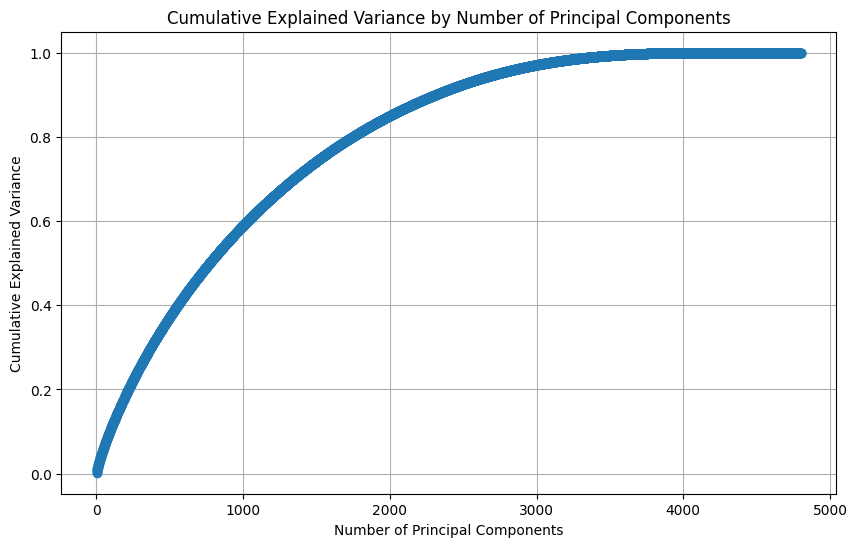

In [93]:
pca = PCA()
pca.fit(scaled_data)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()


In [102]:
pca = PCA(n_components=0.95)

reduced_data = pca.fit_transform(scaled_data)

reduced_df = pd.DataFrame(reduced_data, columns=[f'PC{i+1}' for i in range(reduced_data.shape[1])]) # Keep original indices

In [103]:
non_numeric_columns = df[['movie_id','overview', 'actors', 'title', 'overview_embedding']]
final_df=pd.concat([non_numeric_columns, reduced_df], axis=1)

In [104]:
final_df.head()

,movie_id,overview,actors,actors,title,title,overview_embedding,PC1,PC2,PC3,...,PC2726,PC2727,PC2728,PC2729,PC2730,PC2731,PC2732,PC2733,PC2734,PC2735
0,19995,"In the 22nd century, a paraplegic Marine is di...","['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",0.0,Avatar,0.0,"[0.1523016, -0.22653992, -0.0016465853, 0.2469...",-0.071153,0.177764,-0.495960,...,-0.549049,0.416125,0.583816,-1.235424,-0.217905,1.392769,0.868042,0.672337,-0.556910,-0.856309
1,285,"Captain Barbossa, long believed to be dead, ha...","['Johnny Depp', 'Orlando Bloom', 'Keira Knight...",0.0,Pirates of the Caribbean: At World's End,0.0,"[-0.038105946, -0.4891934, 0.18380359, 0.36690...",-0.084690,-0.084950,-0.229105,...,0.893432,2.389504,-0.449903,1.119013,-1.458596,-1.093995,0.679739,-0.575387,0.505809,-0.845537
2,206647,A cryptic message from Bond’s past sends him o...,"['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...",0.0,Spectre,0.0,"[-0.017233437, -0.1734568, -0.15426032, 0.1692...",-0.155873,0.091269,-0.245384,...,-0.705979,-0.118014,0.797119,0.112190,0.541800,-1.587667,2.604494,-2.320952,0.746060,0.302421
3,49026,Following the death of District Attorney Harve...,"['Christian Bale', 'Michael Caine', 'Gary Oldm...",0.0,The Dark Knight Rises,0.0,"[0.11736373, -0.37266067, 0.13138993, 0.434086...",-0.217352,-0.093446,0.030532,...,0.612776,0.977000,-0.166704,0.246222,-1.200927,0.215816,-0.202876,-1.985444,0.294265,1.107277
4,49529,"John Carter is a war-weary, former military ca...","['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...",0.0,John Carter,0.0,"[-0.07657192, -0.13600394, 0.21922404, 0.27162...",-0.244321,-0.038469,-0.585490,...,0.726909,0.230572,-0.137563,-0.698721,-0.134045,-0.333373,-0.008612,-0.462235,-0.313791,0.454579


In [106]:
final_df.to_csv('reduced_movies.csv', index=False)